In [1]:
ciphertext1="ciphertext/ciphertext1.txt"
ciphertext2="ciphertext/ciphertext2.txt"

In [2]:
answer1="It was disclosed yesterday that several informal but direct contacts have been made with political representatives of the viet cong in moscow.".split()
answer2="Sisyphus teaches the higher fidelity that negates the gods and raises rocks. He too concludes that all is well. This universe now without a master seems to him neither sterile nor fertile. Each atom of that stone, each mineral flake of this mountain full of night, alone forms a world. The struggle itself to the heights is enough to fill a man's heart. One must imagine Sisyphus happy.".split()

In [3]:
def similarity(answer,plaintext):
    plaintext=plaintext.split()
    count=0
    for i in range(len(answer)):
        if answer[i]==plaintext[i]:
            count+=1
    return count/len(answer)

In [4]:
plaintext="Sisyphus teaches the higher fidelity that negates the gods and raises rocks. He too concludes that all is well. This universe now without a master seems to him neither sterile nor fertile. Each atom of that stone, each mineral flake of this mountain full of night, alone forms a world. The struggle itself to the heights is enough to fill a man's heart. One must imagine Sisyphus happy."

In [5]:
similarity(answer2, plaintext)

1.0

In [6]:
from ciphertext_decoder import CiphertextDecoder

decoder1 = CiphertextDecoder(ciphertext1)
decoder2 = CiphertextDecoder(ciphertext2)

In [7]:
result1=[]
result2=[]
n=1000

In [8]:
import pandas as pd

In [9]:
def save_to_csv(curr, result1, result2):
    data=[{"result1":result1[i], "result2":result2[i]} for i in range(n//10)]
    df=pd.DataFrame(data)
    df.to_csv(f"data/analyze{n}.csv", mode='a', index=False)
    print(f"saved at {curr}")

In [10]:
for i in range(n):
    result1.append(similarity(answer1,decoder1.decode()))
    result2.append(similarity(answer2,decoder2.decode()))
    print(f"{(i+1)/10}%...")

    if i!=0 and (i+1)%100==0:
        save_to_csv(i+1, result1, result2)
        result1=[]
        result2=[]

0.1%...
0.2%...
0.3%...
0.4%...
0.5%...
0.6%...
0.7%...
0.8%...
0.9%...
1.0%...
1.1%...
1.2%...
1.3%...
1.4%...
1.5%...
1.6%...
1.7%...
1.8%...
1.9%...
2.0%...
2.1%...
2.2%...
2.3%...
2.4%...
2.5%...
2.6%...
2.7%...
2.8%...
2.9%...
3.0%...
3.1%...
3.2%...
3.3%...
3.4%...
3.5%...
3.6%...
3.7%...
3.8%...
3.9%...
4.0%...
4.1%...
4.2%...
4.3%...
4.4%...
4.5%...
4.6%...
4.7%...
4.8%...
4.9%...
5.0%...
5.1%...
5.2%...
5.3%...
5.4%...
5.5%...
5.6%...
5.7%...
5.8%...
5.9%...
6.0%...
6.1%...
6.2%...
6.3%...
6.4%...
6.5%...
6.6%...
6.7%...
6.8%...
6.9%...
7.0%...
7.1%...
7.2%...
7.3%...
7.4%...
7.5%...
7.6%...
7.7%...
7.8%...
7.9%...
8.0%...
8.1%...
8.2%...
8.3%...
8.4%...
8.5%...
8.6%...
8.7%...
8.8%...
8.9%...
9.0%...
9.1%...
9.2%...
9.3%...
9.4%...
9.5%...
9.6%...
9.7%...
9.8%...
9.9%...
10.0%...
saved at 100
10.1%...
10.2%...
10.3%...
10.4%...
10.5%...
10.6%...
10.7%...
10.8%...
10.9%...
11.0%...
11.1%...
11.2%...
11.3%...
11.4%...
11.5%...
11.6%...
11.7%...
11.8%...
11.9%...
12.0%...
12.1%.

In [37]:
data=pd.read_csv(f"data/analyze{n}.csv")

In [38]:
import nltk

parsing_result1 = sorted(nltk.FreqDist(list(data['result1'])).items(), key=lambda x:x[0])
parsing_result2 = sorted(nltk.FreqDist(list(data['result2'])).items(), key=lambda x:x[0])

In [39]:
parsing_result1

[(0.0, 332),
 (0.0454545454545454, 61),
 (0.0909090909090909, 27),
 (0.1363636363636363, 9),
 (0.2272727272727272, 2),
 (0.2727272727272727, 12),
 (0.3181818181818182, 7),
 (0.3636363636363636, 3),
 (0.4090909090909091, 6),
 (0.4545454545454545, 1),
 (0.5, 2),
 (0.5454545454545454, 4),
 (0.5909090909090909, 2),
 (0.6363636363636364, 6),
 (0.6818181818181818, 36),
 (0.7272727272727273, 6),
 (0.7727272727272727, 15),
 (0.8181818181818182, 12),
 (0.8636363636363636, 18),
 (0.9090909090909092, 124),
 (0.9545454545454546, 71),
 (1.0, 244)]

In [55]:
def decode_rate(parsing_result):
    d1=dict(parsing_result)
    keys=list(d1.keys())
    values=list(d1.values())
    result=0
    for i in range(len(keys)):
        result+=(keys[i]*values[i])
    return result/sum(values)

In [56]:
print(decode_rate(parsing_result1))
print(decode_rate(parsing_result2))

0.5149545454545454
0.6548823529411765


In [40]:
import matplotlib.pyplot as plt

In [41]:
def summarize(parsing_result):
    x=[i[0] for i in parsing_result]
    y=[i[1] for i in parsing_result]

    plt.rcParams['font.family'] = 'AppleGothic'

    plt.plot(x,y)
    plt.xlabel('성공적으로 파싱된 비율')
    plt.ylabel('빈도(경우의 수)')
    plt.title('비율별 파싱 성공 빈도')
    plt.show()

    print("parse | fail : success")
    print(f"       {(n-y[-1])/n} : {y[-1]/n}")

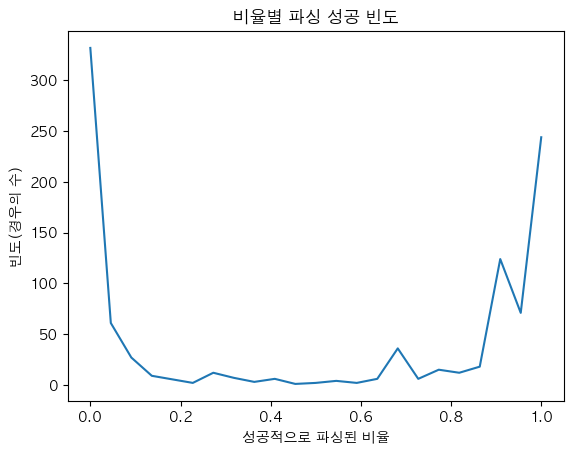

parse | fail : success
       0.756 : 0.244


In [42]:
summarize(parsing_result1)

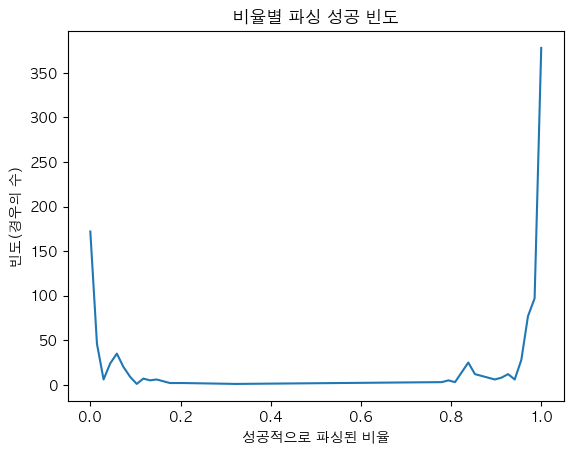

parse | fail : success
       0.622 : 0.378


In [43]:
summarize(parsing_result2)

In [44]:
def summarize(parsing_results):
    x1=[i[0] for i in parsing_results[0]]
    y1=[i[1] for i in parsing_results[0]]
    x2=[i[0] for i in parsing_results[1]]
    y2=[i[1] for i in parsing_results[1]]

    plt.rcParams['font.family'] = 'AppleGothic'

    plt.plot(x1,y1, color="red", label='ciphertext1.txt')
    plt.plot(x2,y2, color="blue", label='ciphertext2.txt')
    plt.xlabel('성공적으로 파싱된 비율')
    plt.ylabel('빈도(경우의 수)')
    plt.title('비율별 파싱 성공 빈도')

    plt.legend()

    plt.show()

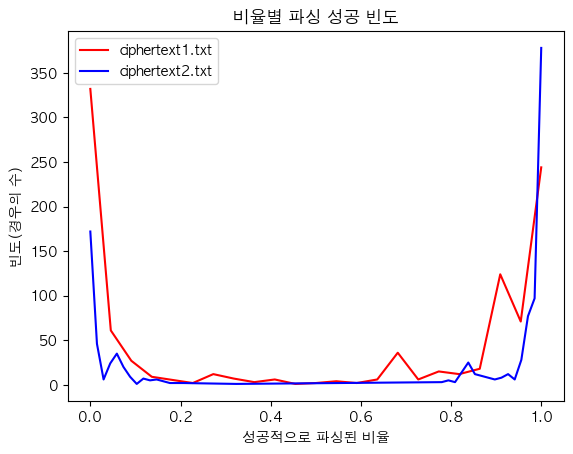

In [45]:
summarize([parsing_result1, parsing_result2])